In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib
import numpy as np
import copy
import random

In [97]:
def visualize_graph(G):
    plt.figure(figsize=(14,8))
    pos = nx.spring_layout(G)  # You can use other layouts as well

    # Draw edges
    
    M = G.number_of_edges()
    edge_colors = range(2, M + 2)
    edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
    cmap = plt.cm.plasma
    
    edges = nx.draw_networkx_edges(G,
    pos,
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,)
    for i in range(M):
        edges[i].set_alpha(edge_alphas[i])


    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)

    # Draw node labels
    node_labels = {node: node for node in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=8,)
    
    #edge_labels = nx.get_edge_attributes(G, 'weight')
    #nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
    
    plt.title("Graph Visualization")
    plt.show()

In [28]:
def generate_sf_graph(n):
    G = nx.scale_free_graph(n=n,alpha=.5,beta=.25,gamma=.25).to_undirected()
    G.remove_edges_from(list(nx.selfloop_edges(G)))
    G = nx.Graph(G)
    G = nx.convert_node_labels_to_integers(G)
    components = list(nx.connected_components(G))
    while len(components) > 1:
        G.add_edge(components[0].pop(), components[1].pop())
        components = list(nx.connected_components(G))
    return G

In [76]:
def add_weights_to_edges_from_dict(graph, weights_dict):
    for edge, weight in weights_dict.items():
        if graph.has_edge(*edge):
            graph[edge[0]][edge[1]]['weight'] = weight
        elif graph.has_edge(*reversed(edge)):
            graph[reversed(edge)[0]][reversed(edge)[1]]['weight'] = weight
        else:
            print(f"Edge {edge} not found in the graph.")

In [32]:
G = generate_sf_graph(50)
BC = nx.betweenness_centrality(nx.line_graph(G))
BC

{(4, 10): 0.0,
 (9, 13): 0.0,
 (8, 14): 0.0,
 (5, 15): 0.0,
 (5, 18): 0.0,
 (19, 21): 0.0,
 (5, 23): 0.0,
 (3, 26): 0.0,
 (2, 28): 0.0,
 (12, 29): 0.0,
 (0, 30): 0.0,
 (12, 31): 0.0,
 (27, 33): 0.0,
 (25, 34): 0.0,
 (5, 35): 0.0,
 (3, 36): 0.0,
 (2, 37): 0.0,
 (24, 38): 0.0,
 (25, 41): 0.0,
 (25, 42): 0.0,
 (32, 43): 0.0,
 (39, 44): 0.0,
 (40, 45): 0.0,
 (0, 46): 0.0,
 (1, 47): 0.0,
 (6, 48): 0.0,
 (24, 49): 0.0,
 (0, 20): 0.03397623222287161,
 (0, 27): 0.05429573348918759,
 (7, 32): 0.03144360023378141,
 (0, 5): 0.23931424118449252,
 (0, 6): 0.044749659068770695,
 (5, 7): 0.04365867913500876,
 (7, 19): 0.03389830508474576,
 (0, 8): 0.03389830508474576,
 (2, 11): 0.0018507695304889925,
 (2, 16): 0.0018507695304889925,
 (0, 1): 0.10130527956360802,
 (0, 17): 0.11231248782388464,
 (5, 9): 0.03389830508474576,
 (0, 25): 0.09588934346386128,
 (2, 25): 0.014806156243911944,
 (0, 3): 0.12739138905123706,
 (0, 32): 0.082583284628872,
 (6, 27): 0.0030196766023767776,
 (0, 4): 0.096337424508084

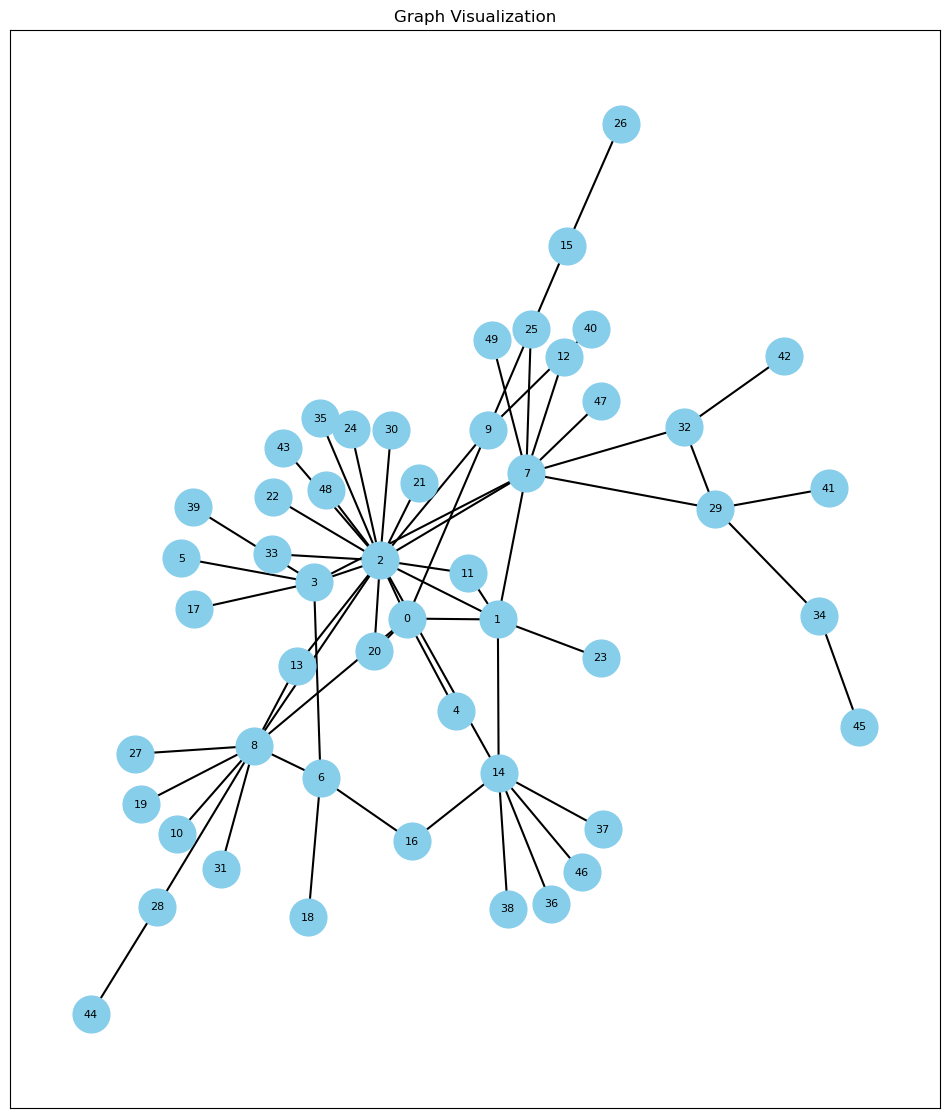

In [31]:
visualize_graph(G)

In [94]:
BA = nx.barabasi_albert_graph(50,m =1)

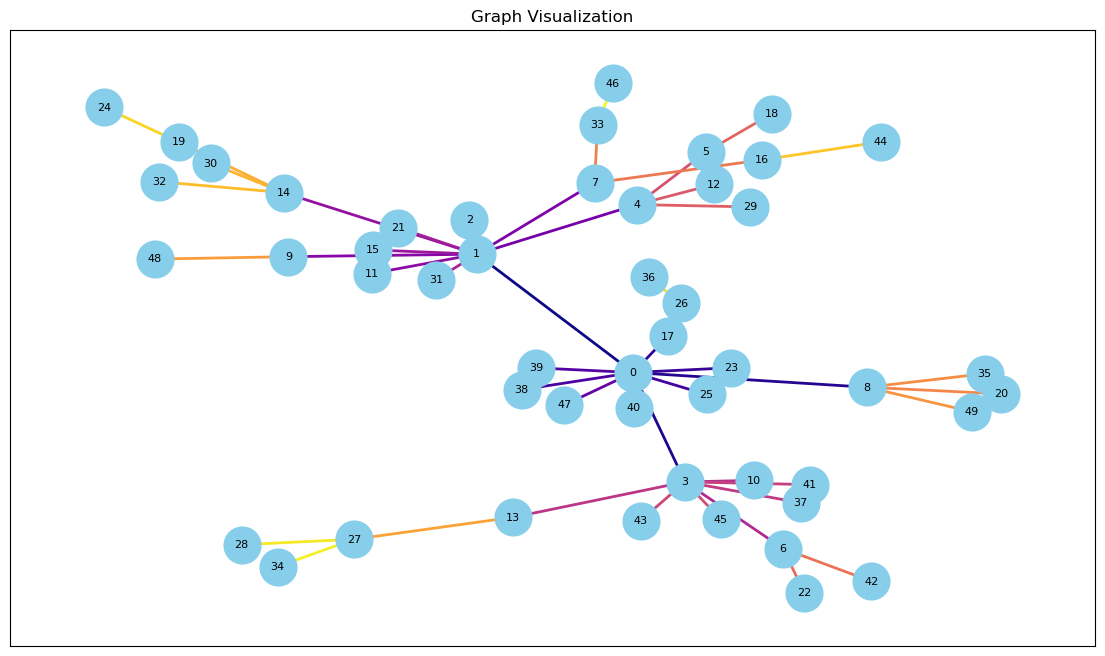

In [95]:
visualize_graph(BA)

In [96]:
add_weights_to_edges_from_dict(BA,nx.betweenness_centrality(nx.line_graph(BA)))
#print(nx.betweenness_centrality(nx.line_graph(BA)))

TypeError: 'LineCollection' object is not subscriptable

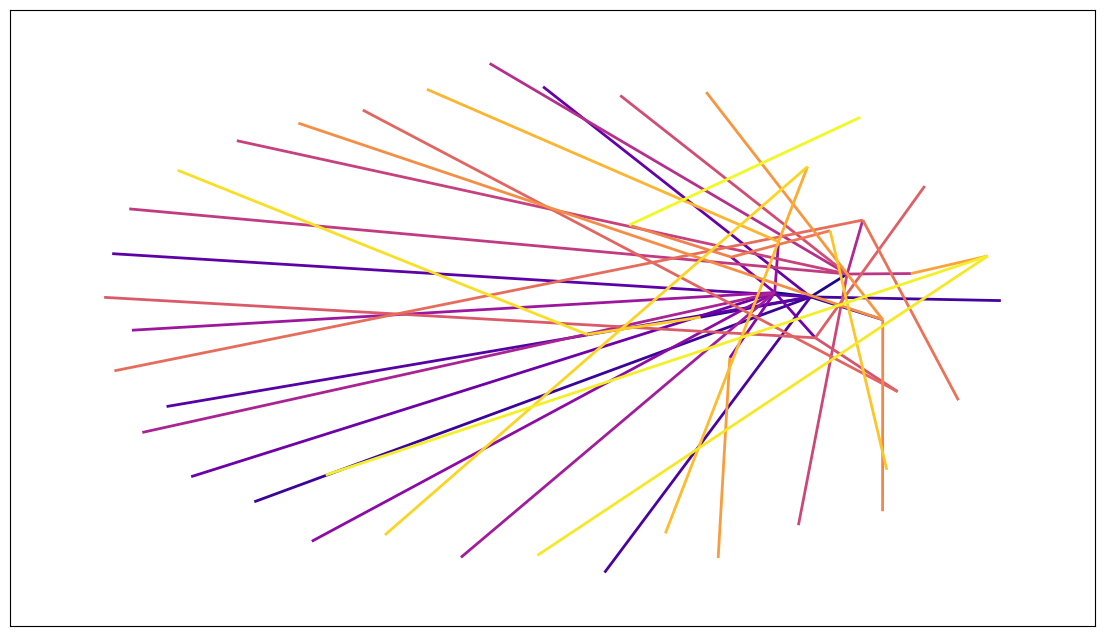

In [98]:
visualize_graph(BA)

Graph with 50 nodes and 96 edges
